<a href="https://colab.research.google.com/github/xxpaulo-victorxx/UFC-Data-Analysis-Visualization/blob/main/UFC_Data_Analysis_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **1. Introduction**

MMA stands for Mixed Martial Arts. It is a combat sport where one trains in punching, kicking, clinching and grappling by amalgamating different styles/systems such as Western Boxing, Muay Thai, Jiu Jitsu (BJJ), Wrestling, etc. The Ultimate Fighting Championship (UFC) is an American mixed martial arts organization based in Las Vegas,  and is the largest MMA promotion in the world and features the top-ranked fighters of the sport. Based in the United States, the UFC produces events worldwide that showcase twelve weight divisions and abide by the Unified Rules of Mixed Martial Arts. Due to increase in popularity and love for the game we decided to create a prediction model for obtaining the results of a MMA fight. It has many real life applications such as gambling, journalism and improvement of player performance by scrutinizing the advantages of the other opponents and refining his own performance in accordance to that data. Today, the popularity of the UFC has exceeded all other fighting sports and now consistently achieves more pay-per-view (PPV) buys than boxing and even rivalling the WWE and hence we have settled on UFC for our prediction model.

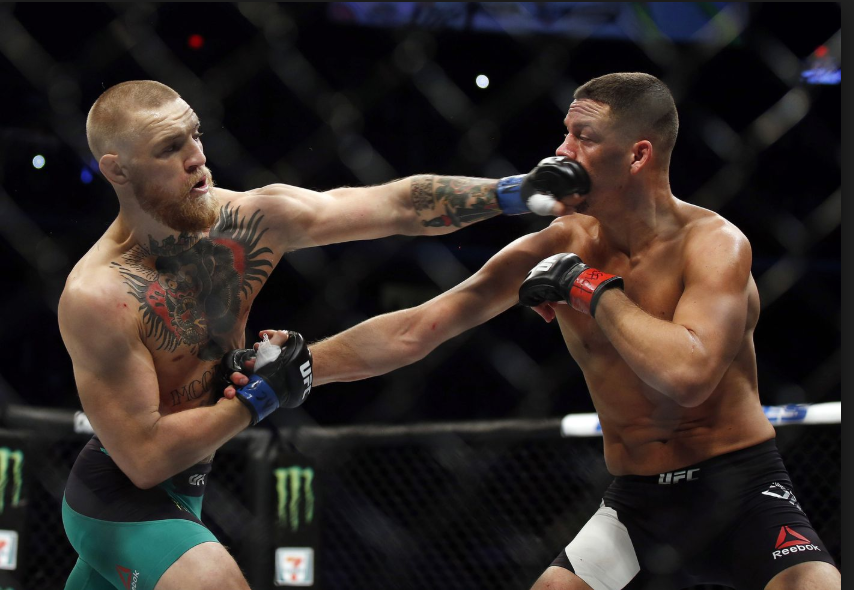

## **2. Loading libraries and retrieving data**

Not all python capabilities are loaded to your working environment by default. We would need to import every library we are going to use. We will choose alias names to our modules for the sake of convenience (e.g. numpy --> np, pandas --> pd)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Operator for sorting Dictionaries
import operator

# Warnings for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as offline
init_notebook_mode(connected = True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [ ]:
df = pd.read_csv("/content/UFC_data.csv")

df

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,23.0,170.0,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
4,3,1,30.0,167.0,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0,0,26.0,172.0,"Tlaltenango, Zacatecas Mexico",2355,"San Diego, California USA",Jose Quinonez,61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1473,2,1,26.0,165.0,"Tampa, Florida USA",2610,"Tampa, Florida USA",Geane Herrera,56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
1474,3,2,36.0,187.0,"Doylestown, Pennsylvania USA",1694,"Dana Point, California USA",Patrick Cummins,93,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1475,3,1,31.0,167.0,Irvine Scotland,2339,Glasgow Scotland,Joanne Calderwood,52,0.0,...,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,KO/TKO,blue


## **3. Understanding the data**

Dataset contains list of all UFC fights since 2013 with summed up entries of each fighter's round by round record preceding that fight. Created in the attempt to predict a UFC fight winner . Each row represents a single fight - with each fighter's previous records summed up prior to the fight. Blank stats mean its the fighter's first fight since 2013 which is where granular data for UFC fights.

We have about 895 columns, few important columns to note:

* BPrev: Previous fights by 'Blue' fighter
* B_Age: Age of 'Blue' fighter
* B_Height: Height of 'Blue' fighter
* B_Weight: Weight of 'Blue' fighter
* B_Location: Location of 'Blue' fighter
* B_Hometown: Hometown of 'Blue fighter
* RPrev: Previous fights by 'Red' fighter
* R_Age: Age of 'Red' fighter
* R_Height: Height of 'Red' fighter
* R_Weight: Weight of 'Red' fighter
* R_Location: Location of 'Red' fighter
* R_Hometown: Hometown of 'Red fighter
* Date: Date of the fight
* winby: How did the fighter win the fight (decision, submission KO etc.)
* winner: Who was the winner of the fight?

Apart from this, dataset contains all the techniques (punch, kicks, takedowns etc.) attempted and landed by the fighters in each round.

In [ ]:
df['R_Name'].head()

0    Antonio Carlos Junior
1             Colton Smith
2               Joe Lauzon
3             Louis Smolka
4        Raquel Pennington
Name: R_Name, dtype: object

In [ ]:
df['R_Name'].tail()

1472          Alejandro Perez
1473           Ali Bagautinov
1474    Antonio Carlos Junior
1475       Valerie Letourneau
1476             Jacare Souza
Name: R_Name, dtype: object

In [ ]:
df['B_Name'].head()

0           Marvin Vettori
1    Carlos Diego Ferreira
2            Takanori Gomi
3           Brandon Moreno
4       Elizabeth Phillips
Name: B_Name, dtype: object

In [ ]:
df['B_Name'].tail()

1472        Jose Quinonez
1473        Geane Herrera
1474      Patrick Cummins
1475    Joanne Calderwood
1476       Gegard Mousasi
Name: B_Name, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


In [ ]:
df.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1474.000000,1476.000000,1477.000000,1477.000000,978.000000,978.000000,978.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.735274,0.654705,30.954545,177.451220,1964.633040,73.804333,0.036810,0.896728,0.431493,2.986708,...,211.965278,34.062500,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444
std,1.895561,1.057269,4.020311,8.561541,666.949141,14.980531,0.193748,1.255722,0.830527,3.987291,...,139.412374,68.819742,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,1755.000000,65.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000
50%,1.000000,0.000000,31.000000,177.000000,2156.000000,70.000000,0.000000,0.000000,0.000000,2.000000,...,214.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000
75%,3.000000,1.000000,34.000000,182.000000,2337.000000,84.000000,0.000000,1.000000,1.000000,4.000000,...,294.500000,47.500000,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000
max,11.000000,7.000000,46.000000,213.000000,2882.000000,120.000000,2.000000,9.000000,6.000000,33.000000,...,647.000000,496.000000,529.000000,144.000000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


In [ ]:
# Add new analysis rows (unique, top, freq)
df.describe(include='all')

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
count,1477.000000,1477.000000,1474.000000,1476.000000,1471,1477.000000,1470,1477,1477.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,1461,1477
unique,NaN,NaN,NaN,NaN,568,NaN,431,719,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,NaN,NaN,NaN,NaN,Rio de Janeiro Brazil,NaN,Rio de Janeiro Brazil,Tim Means,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
freq,NaN,NaN,NaN,NaN,32,NaN,38,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,867
mean,1.735274,0.654705,30.954545,177.451220,NaN,1964.633040,NaN,NaN,73.804333,0.036810,...,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444,NaN,NaN
std,1.895561,1.057269,4.020311,8.561541,NaN,666.949141,NaN,NaN,14.980531,0.193748,...,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212,NaN,NaN
min,0.000000,0.000000,20.000000,152.000000,NaN,129.000000,NaN,NaN,52.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,28.000000,172.000000,NaN,1755.000000,NaN,NaN,65.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000,NaN,NaN
50%,1.000000,0.000000,31.000000,177.000000,NaN,2156.000000,NaN,NaN,70.000000,0.000000,...,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000,NaN,NaN
75%,3.000000,1.000000,34.000000,182.000000,NaN,2337.000000,NaN,NaN,84.000000,0.000000,...,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000,NaN,NaN


In [ ]:
print("Number of records: ", df.shape[0])
print("Number of Blue Fighters: ", len(df.B_ID.unique()))
print("Number of Red Fighters: ", len(df.R_ID.unique()))

Number of records:  1477
Number of Blue Fighters:  715
Number of Red Fighters:  627


In [ ]:
df.isnull().sum(axis=0)

BPrev                                 0
BStreak                               0
B_Age                                 3
B_Height                              1
B_HomeTown                            6
                                   ... 
R__Round5_TIP_Neutral Time         1333
R__Round5_TIP_Side Control Time    1333
R__Round5_TIP_Standing Time        1333
winby                                16
winner                                0
Length: 895, dtype: int64

## **4. Missing Values**

We oberserve there are some missing values in our data. I know Age and Height are important features in any combat sport and they have handful of missing values.

We will address the missing values in age and height. We can simply delete rows with missing values, but usually we would want to take advantage of as many data points as possible. Replacing missing values with zeros would not be a good idea - as age 0 will have actual meanings and that would change our data.

Therefore a good replacement value would be something that doesn't affect the data too much, such as the median or mean. the "fillna" function replaces every NaN (not a number) entry with the given input (the mean of the column in our case). Let's do this for both 'Blue' and 'Red' fighters.

In [ ]:
df['B_Age'] = df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height'] = df['B_Height'].fillna(np.mean(df['B_Height']))
df['R_Age'] = df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height'] = df['R_Height'].fillna(np.mean(df['R_Height']))

## **5. Problem Statements**

As a huge fan of MMA and a beginner level data science learner I often get thoughts of trying to explore and predict the outcome and other statistics of MMA fights. The problem is that understanding and predicting fights by their nature can be very unpredictable. Few of the thoughts are listed below:

1. Which corner has historically given more victories?
2. How does Age/Height influence the result of a fight
3. What is the most common way of winning a fight?
4. Most popular training locations for fighters
5. Comparing and analysing different techniques used by fighters in different rounds





## **6. Data Visualization**

### Which corner has historically given more victories?

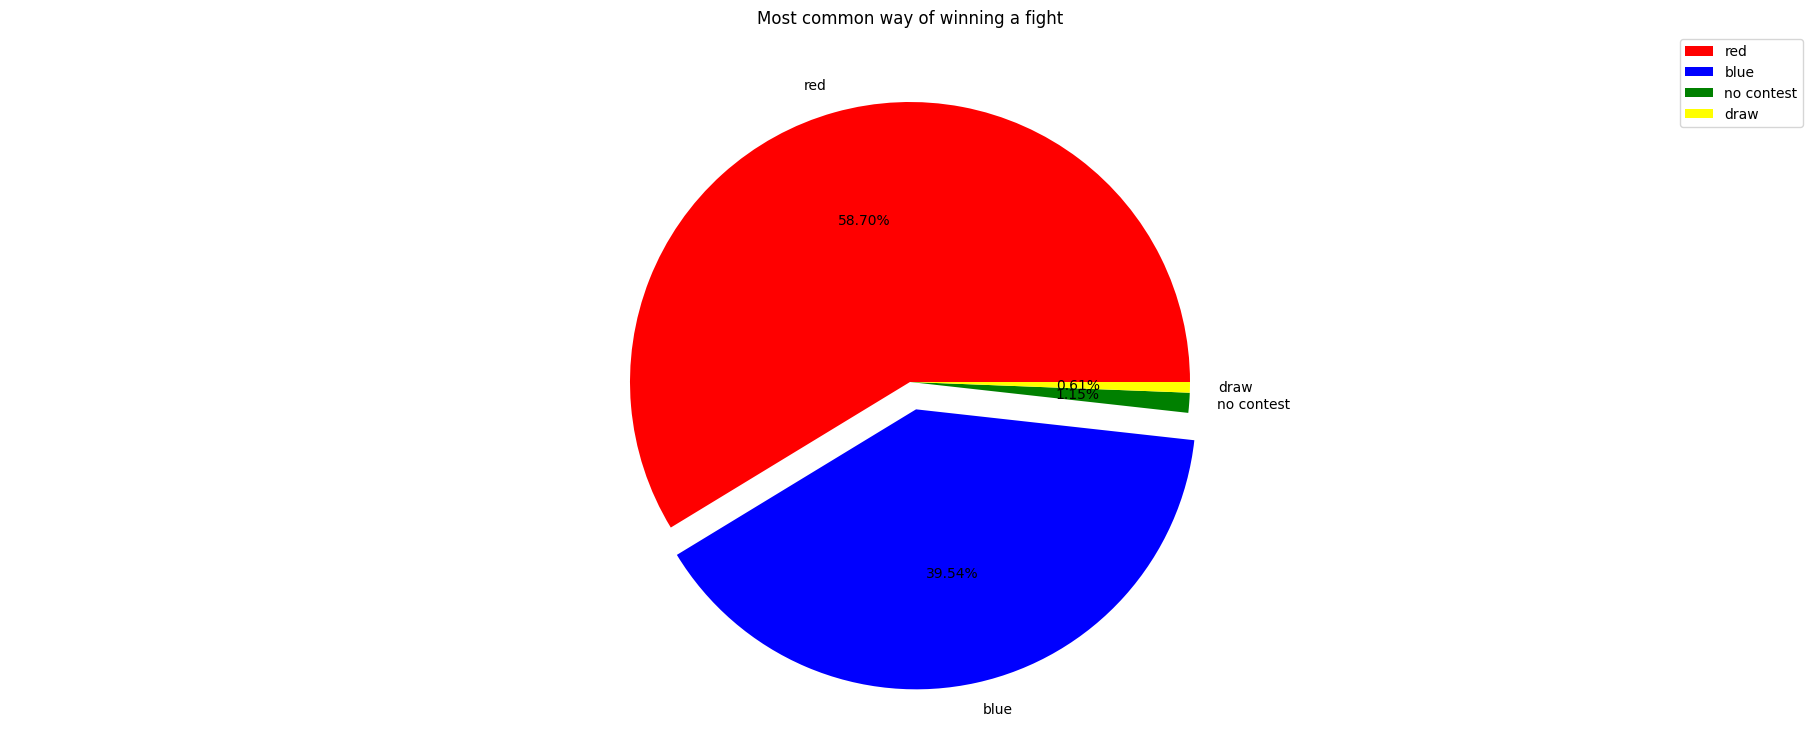

In [ ]:
fig = plt.figure (figsize=(18,7))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
temp = df['winner'].value_counts()
ax.pie(temp.values, labels = temp.index, autopct='%1.2f%%',explode=(0,0.1,0,0), colors = ['red', 'blue','green', 'yellow'])
labels = temp.index
plt.legend(labels, loc='best')
plt.title('Most common way of winning a fight')
plt.show()

From the above observation we can conclude that the fighters in the RED Corner have a higher probability of winning

### Influence of age on the outcome of the fight

<Axes: xlabel='R_Age', ylabel='Density'>

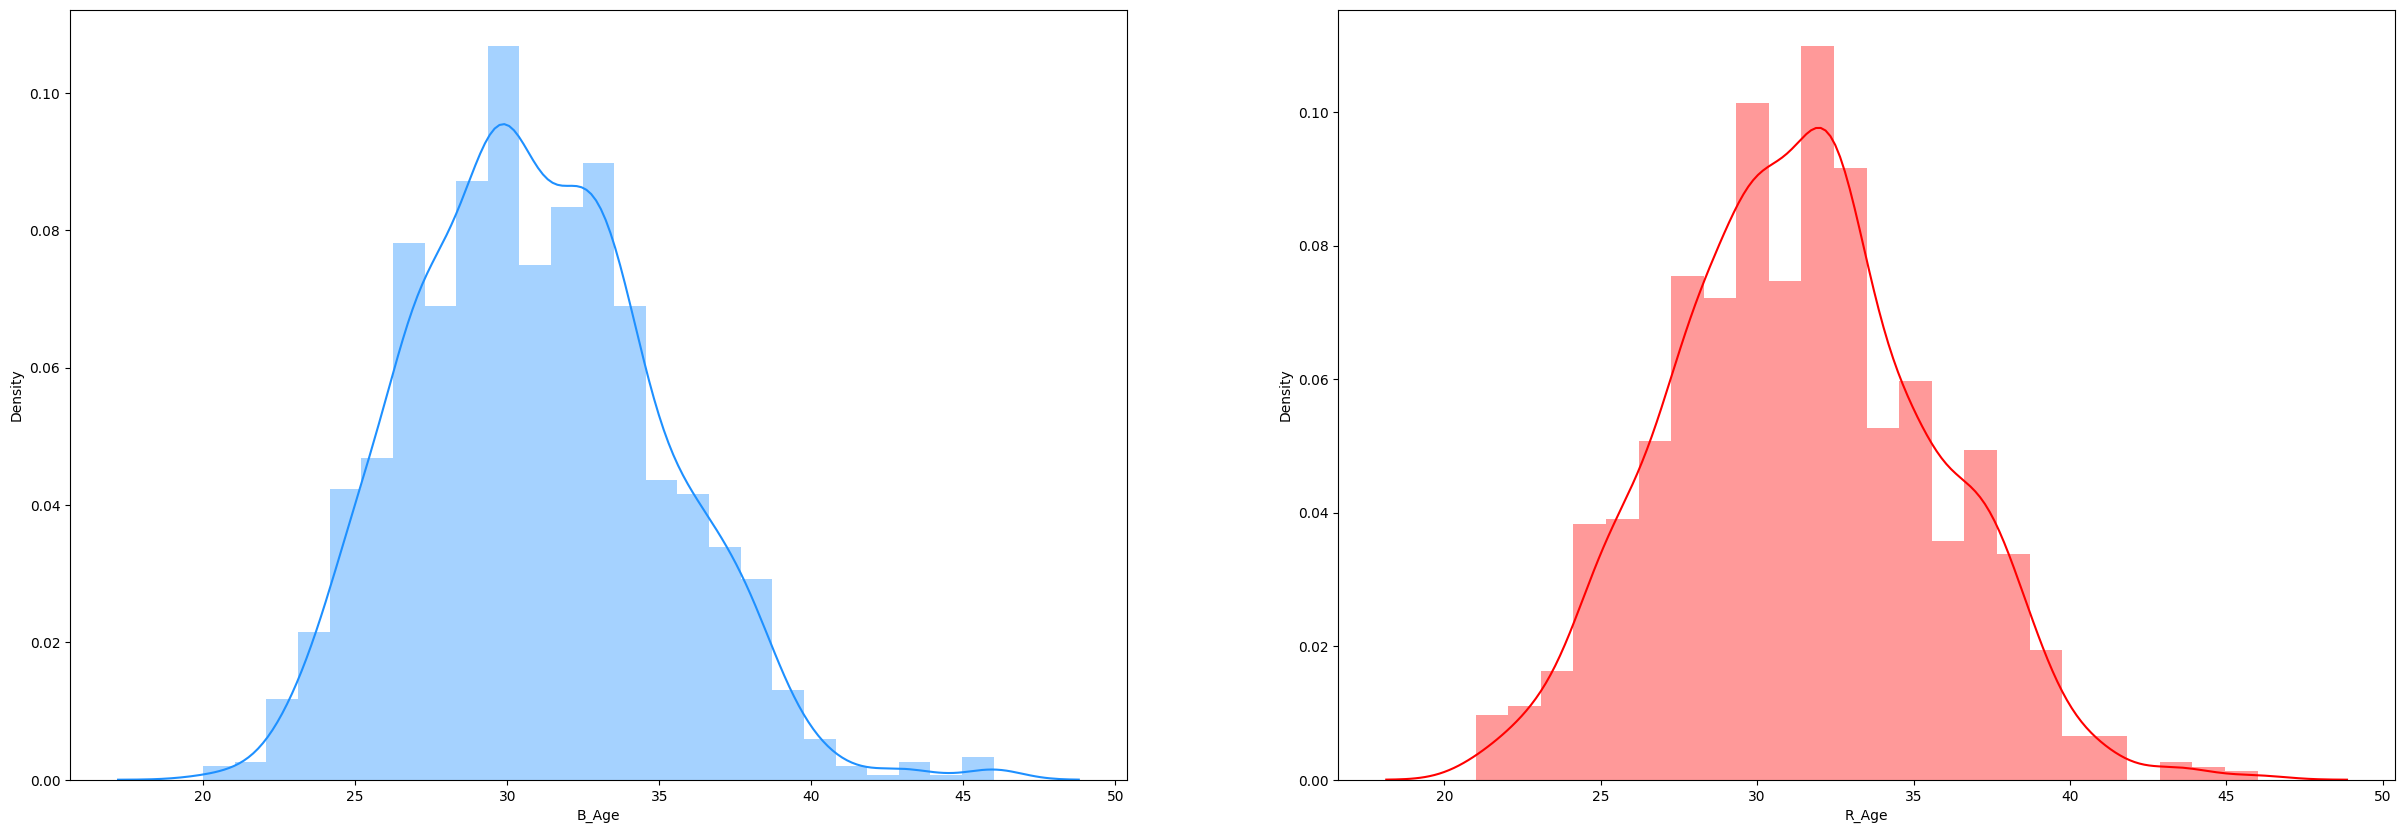

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
sns.distplot(df.B_Age, ax=ax[0], color='dodgerblue')
sns.distplot(df.R_Age, ax=ax[1], color='red')

Age is a big factor in any sport, moresoever in MMA where you must have combination of strength, agility and speed (among other skills). These skills peak at 27-35 and fighter's fighting at this age should have higher likelyhood of winning the fight. Let's validate by grouping age for Blue fighters who have won the fight

In [ ]:
BAge = df.groupby(['B_Age']).count()['winner']
BlueAge = BAge.sort_values(axis=0, ascending=False)
BlueAge.head(15)

B_Age
30.0    164
33.0    138
29.0    134
32.0    128
27.0    120
31.0    112
28.0    106
34.0    106
26.0     72
35.0     67
25.0     65
36.0     64
37.0     52
38.0     45
24.0     33
Name: winner, dtype: int64

Clearly, most fights have been won by fighters in their late 20’s through early 30’s as they peak during this time and then lose strength, quickness and cardiovascular capacity¶
On the other hand, younger fighters do not develop peak strength till 27-28~ while older fighters are usually slower and more likely to lose. Let's check if this is true in our data. This time we will check for 'Red' fighters.